In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
project_directory = r'C:\Users\marco\OneDrive\Desktop\Final Year Project'
os.chdir(project_directory)
base_dir = os.getcwd() 

## Visualisations for Arousal Algorithms 

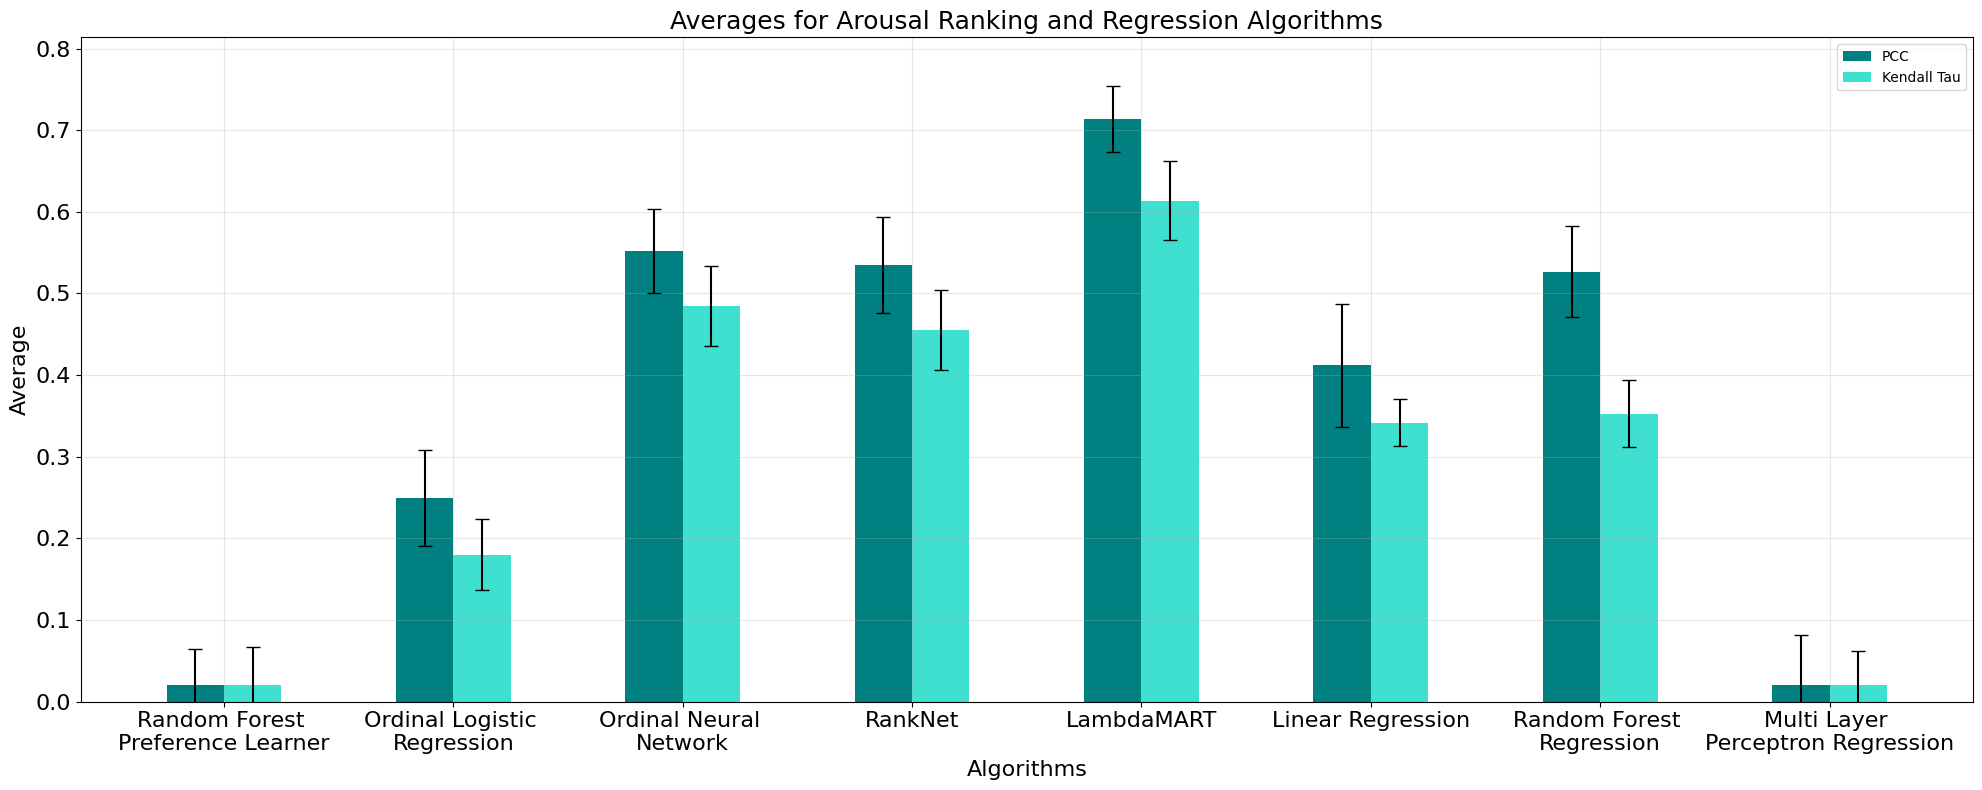

In [14]:
def calculate_ci(mean, std_dev, n):
    margin_error = 1.96 * (std_dev / np.sqrt(n))
    return (mean - margin_error, mean + margin_error)

file_dir = 'RECOLA Ranking Algorithms/Evaluation'

algorithm_names = {
    'RandomForest/random_forest_evaluation_arousal.csv': 'Random Forest \nPreference Learner',
    'Ordinal Logistic Regression/arousal_evaluation_results.csv': 'Ordinal Logistic \nRegression',
    'Ordinal Neural Network/arousal_quartile_evaluation_results.csv': 'Ordinal Neural \nNetwork',
    'RankNET/ranknet_evaluation_results_arousal.csv': 'RankNet',
    'LambdaMart/individual_evaluation_results_arousal.csv': 'LambdaMART',
    'Regression/linear_regression_evaluation_arousal.csv': 'Linear Regression',
    'Regression/random_forest_regression_evaluation_arousal.csv': 'Random Forest \nRegression',
    'Regression/mlp_regression_evaluation_arousal.csv': 'Multi Layer \nPerceptron Regression',
}


base_output_dir = 'RECOLA Ranking Algorithms/Evaluation/Visualisations/Arousal'
means_dir = os.path.join(base_output_dir, 'Mean')
std_devs_dir = os.path.join(base_output_dir, 'StandardDeviations')
cis_dir = os.path.join(base_output_dir, 'ConfidenceIntervals')
plots_dir = os.path.join(base_output_dir, 'Plots')

os.makedirs(means_dir, exist_ok=True)
os.makedirs(std_devs_dir, exist_ok=True)
os.makedirs(cis_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

models = list(algorithm_names.values())
pcc_means, kendall_means = [], []
pcc_cis, kendall_cis = [], []


for file_name, algorithm_name in algorithm_names.items():
    full_path = os.path.join(file_dir, file_name)
    if os.path.exists(full_path):

        data = pd.read_csv(full_path)
        
        # Calculate mean and standard deviation for each metric
        pcc_mean = data['PCC'].mean()
        kendall_tau_mean = data['KendallTau'].mean()
        
        pcc_sd = data['PCC'].std()
        kendall_tau_sd = data['KendallTau'].std()
        
        # Calculate confidence intervals for each metric
        num_samples = len(data)
        pcc_ci_lower, pcc_ci_upper = calculate_ci(pcc_mean, pcc_sd, num_samples)
        kendall_ci_lower, kendall_ci_upper = calculate_ci(kendall_tau_mean, kendall_tau_sd, num_samples)

        pcc_means.append(max(pcc_mean, 0.02))
        kendall_means.append(max(kendall_tau_mean, 0.02))
        
        # Replace invalid characters in file names
        safe_algorithm_name = algorithm_name.replace('\n', '_')

        pcc_cis.append((pcc_ci_lower, pcc_ci_upper))
        kendall_cis.append((kendall_ci_lower, kendall_ci_upper))
        
        mean_df = pd.DataFrame({'PCC': [pcc_mean], 'KendallTau': [kendall_tau_mean]})
        std_dev_df = pd.DataFrame({'PCC': [pcc_sd], 'KendallTau': [kendall_tau_sd]})
        ci_df = pd.DataFrame({
            'PCC_Lower': [pcc_ci_lower], 'PCC_Upper': [pcc_ci_upper],
            'KendallTau_Lower': [kendall_ci_lower], 'KendallTau_Upper': [kendall_ci_upper]
        })

        mean_df.to_csv(os.path.join(means_dir, f'{safe_algorithm_name}_means.csv'), index=False)
        std_dev_df.to_csv(os.path.join(std_devs_dir, f'{safe_algorithm_name}_std_devs.csv'), index=False)
        ci_df.to_csv(os.path.join(cis_dir, f'{safe_algorithm_name}_cis.csv'), index=False)

def plot_enhanced_model_comparison(models, pcc_means, kendall_means, pcc_cis, kendall_cis, output_path):
    fig, ax = plt.subplots(figsize=(20, 8))
    index = np.arange(len(models))
    bar_width = 0.25
    
    pcc_bars = ax.bar(index - bar_width / 2, pcc_means, bar_width, yerr=[(ci[1] - ci[0]) / 2 for ci in pcc_cis], capsize=5, color='teal', label='PCC')
    kendall_bars = ax.bar(index + bar_width / 2, kendall_means, bar_width, yerr=[(ci[1] - ci[0]) / 2 for ci in kendall_cis], capsize=5, color='turquoise', label='Kendall Tau')
    
    ax.set_xlabel('Algorithms', fontsize = 16)
    ax.set_ylabel('Average', fontsize = 16)
    ax.set_title('Averages for Arousal Ranking and Regression Algorithms', fontsize = 18)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(models, rotation=360, ha='center', fontsize= 16)
    ax.legend()
    ax.grid(True, alpha = 0.3)
    
    ax.set_xticks(index)
    ax.set_xticklabels(models, rotation=360, ha='center', fontsize = 16)

    ax.tick_params(axis='y', labelsize=16)
    

    plt.ylim(0, max(max(pcc_means), max(kendall_means)) + 0.1)
    plt.tight_layout()
    full_output_path = os.path.join(plots_dir, output_path)
    plt.savefig(full_output_path)
    plt.show()

plot_enhanced_model_comparison(models, pcc_means, kendall_means, pcc_cis, kendall_cis, 'arousal_algorithms_comparison.png')


## Visualisations for Valence Algorithms

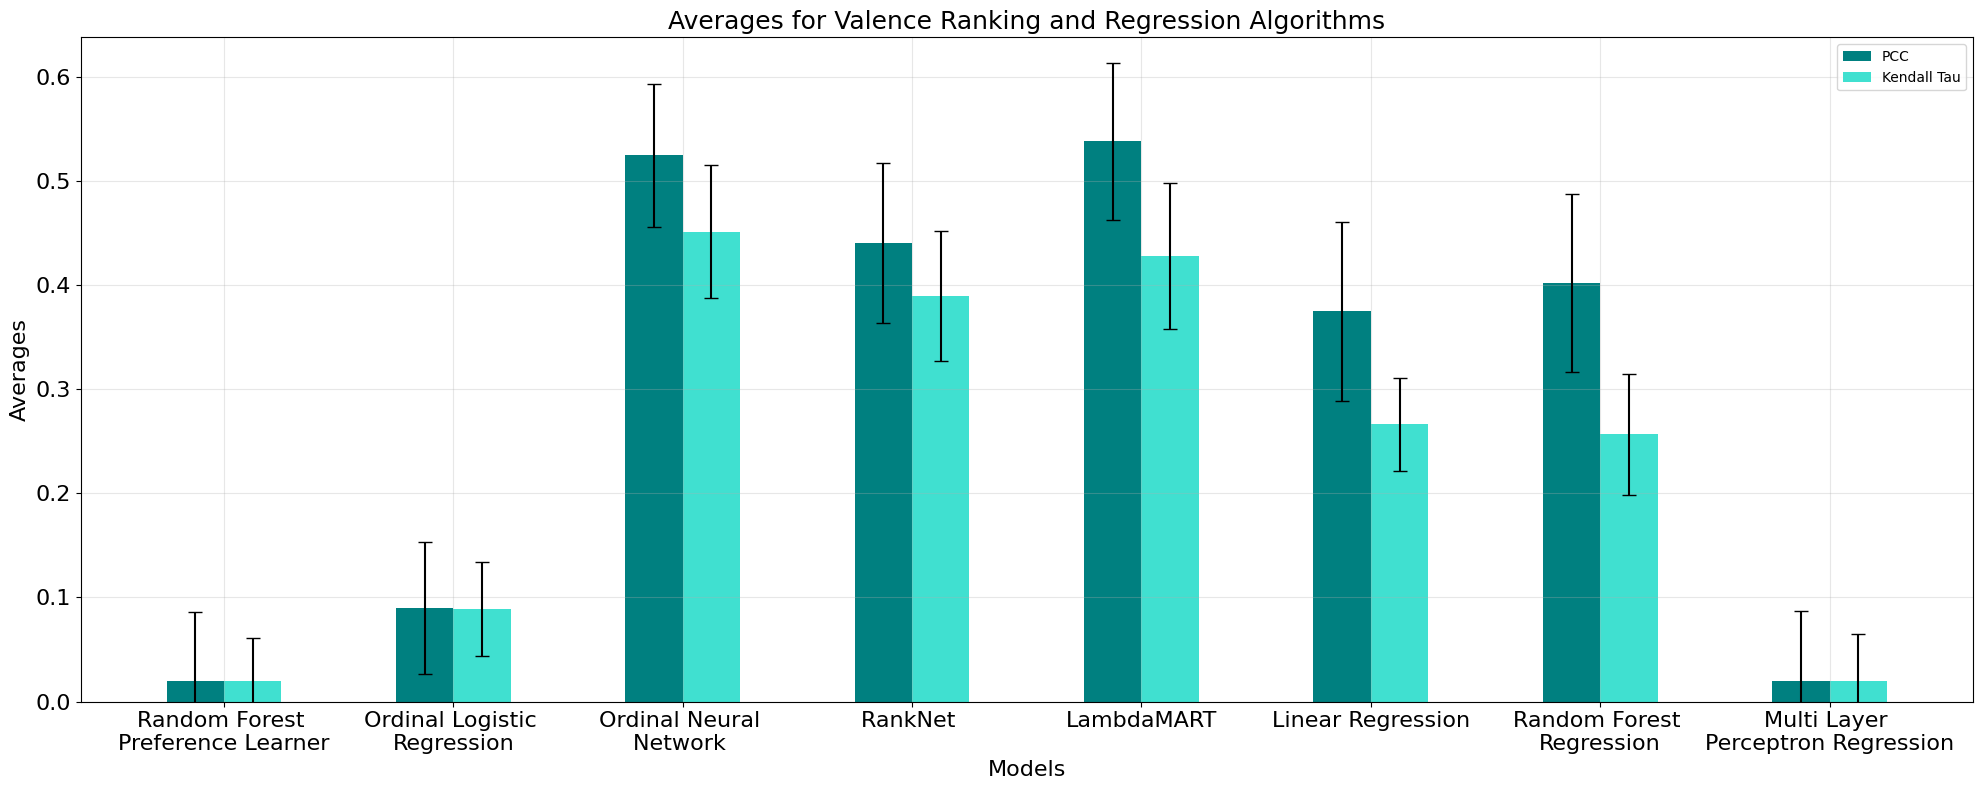

In [13]:
def calculate_ci(mean, std_dev, n):
    margin_error = 1.96 * (std_dev / np.sqrt(n))
    return (mean - margin_error, mean + margin_error)

file_dir = 'RECOLA Ranking Algorithms/Evaluation'

# File paths
algorithm_names = {
    'RandomForest/random_forest_Evaluation_valence.csv': 'Random Forest \nPreference Learner',
    'Ordinal Logistic Regression/valence_evaluation_results.csv': 'Ordinal Logistic \nRegression',
    'Ordinal Neural Network/valence_quartile_evaluation_results.csv': 'Ordinal Neural \nNetwork ',
    'RankNET/ranknet_evaluation_results_valence.csv': 'RankNet ',
    'LambdaMart/individual_Evaluation_Results_valence.csv': 'LambdaMART',
    'Regression/linear_regression_evaluation_valence.csv': 'Linear Regression',
    'Regression/random_forest_regression_evaluation_valence.csv': 'Random Forest \nRegression',
    'Regression/mlp_regression_evaluation_valence.csv': 'Multi Layer \nPerceptron Regression',
}

base_output_dir = 'RECOLA Ranking Algorithms/Evaluation/Visualisations/Valence'
means_dir = os.path.join(base_output_dir, 'Mean')
std_devs_dir = os.path.join(base_output_dir, 'StandardDeviations')
cis_dir = os.path.join(base_output_dir, 'ConfidenceIntervals')
plots_dir = os.path.join(base_output_dir, 'Plots')

os.makedirs(means_dir, exist_ok=True)
os.makedirs(std_devs_dir, exist_ok=True)
os.makedirs(cis_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

models = list(algorithm_names.values())
pcc_means, kendall_means = [], []
pcc_cis, kendall_cis = [], []


for file_name, algorithm_name in algorithm_names.items():
    full_path = os.path.join(file_dir, file_name)
    if os.path.exists(full_path):

        data = pd.read_csv(full_path)
        
        # Calculate mean and standard deviation for each metric
        pcc_mean = data['PCC'].mean()
        kendall_tau_mean = data['KendallTau'].mean()
        
        pcc_sd = data['PCC'].std()
        kendall_tau_sd = data['KendallTau'].std()
        
        # Calculate confidence intervals for each metric
        num_samples = len(data)
        pcc_ci_lower, pcc_ci_upper = calculate_ci(pcc_mean, pcc_sd, num_samples)
        kendall_ci_lower, kendall_ci_upper = calculate_ci(kendall_tau_mean, kendall_tau_sd, num_samples)

        pcc_means.append(max(pcc_mean, 0.02))
        kendall_means.append(max(kendall_tau_mean, 0.02))
        
        pcc_cis.append((pcc_ci_lower, pcc_ci_upper))
        kendall_cis.append((kendall_ci_lower, kendall_ci_upper))
        
        # Replace invalid characters in file names
        safe_algorithm_name = algorithm_name.replace('\n', '_')
        
        mean_df = pd.DataFrame({'PCC': [pcc_mean], 'KendallTau': [kendall_tau_mean]})
        std_dev_df = pd.DataFrame({'PCC': [pcc_sd], 'KendallTau': [kendall_tau_sd]})
        ci_df = pd.DataFrame({
            'PCC_Lower': [pcc_ci_lower], 'PCC_Upper': [pcc_ci_upper],
            'KendallTau_Lower': [kendall_ci_lower], 'KendallTau_Upper': [kendall_ci_upper]
        })

        mean_df.to_csv(os.path.join(means_dir, f'{safe_algorithm_name}_means.csv'), index=False)
        std_dev_df.to_csv(os.path.join(std_devs_dir, f'{safe_algorithm_name}_std_devs.csv'), index=False)
        ci_df.to_csv(os.path.join(cis_dir, f'{safe_algorithm_name}_cis.csv'), index=False)

def plot_enhanced_model_comparison(models, pcc_means, kendall_means, pcc_cis, kendall_cis, output_path):
    fig, ax = plt.subplots(figsize=(20, 8))
    index = np.arange(len(models))
    bar_width = 0.25
    
    pcc_bars = ax.bar(index - bar_width / 2, pcc_means, bar_width, yerr=[(ci[1] - ci[0]) / 2 for ci in pcc_cis], capsize=5, color='teal', label='PCC')
    kendall_bars = ax.bar(index + bar_width / 2, kendall_means, bar_width, yerr=[(ci[1] - ci[0]) / 2 for ci in kendall_cis], capsize=5, color='turquoise', label='Kendall Tau')
    
    ax.set_xlabel('Models', fontsize = 16)
    ax.set_ylabel('Averages', fontsize = 16)
    ax.set_title('Averages for Valence Ranking and Regression Algorithms', fontsize = 18)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(models, rotation=360, ha='center', fontsize = 16)
    ax.legend()
    ax.grid(True, alpha = 0.3)
    
    ax.set_xticks(index)
    ax.set_xticklabels(models, rotation=360, ha='center', fontsize = 16)
    ax.tick_params(axis='y', labelsize=16)

    plt.ylim(0, max(max(pcc_means), max(kendall_means)) + 0.1)
    plt.tight_layout()
    full_output_path = os.path.join(plots_dir, output_path)
    plt.savefig(full_output_path)
    plt.show()

plot_enhanced_model_comparison(models, pcc_means, kendall_means, pcc_cis, kendall_cis, 'valence_algorithms_comparison.png')
